<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_15_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

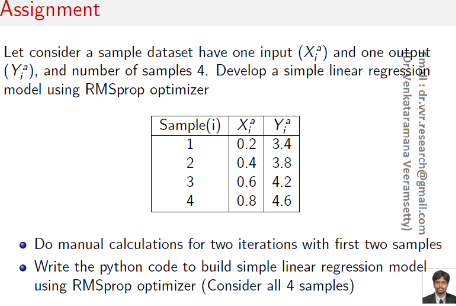

In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6
4,5,1.0,5.0


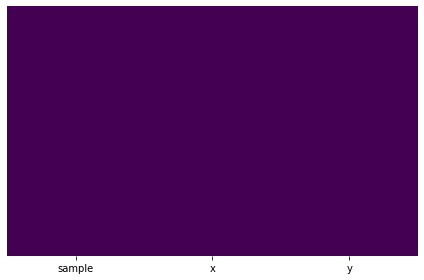

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [4]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.x, df.y, test_size = 0.30, random_state = 3)

In [5]:
x_train

1    0.4
0    0.2
2    0.6
Name: x, dtype: float64

In [7]:
y_train

1    3.8
0    3.4
2    4.2
Name: y, dtype: float64

In [8]:
x1=[]
y1=[]
for i,j in zip(x_train,y_train):
  x1.append(i)
  y1.append(j)

**RMS PROP OPTIMIZER**

In [33]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
learning_rate=0.1
epochs=800
gama=0.9
iter=1
sample=1
Em = Ec = 0 #sum of squares of gradient
ns = len(x1) #number of samples in training dataset
ep = 10**(-8)

while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    
    derivE_m = derivE_m.subs(x,x1[sample-1])
    derivE_m = derivE_m.subs(y,y1[sample-1])

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,x1[sample-1])
    derivE_c = derivE_c.subs(y,y1[sample-1])

    gm = derivE_m
    gc = derivE_c

    #step 5 
    Em = gama*Em + (1-gama)*(gm**2)
    Ec = gama*Ec + (1-gama)*(gc**2)

    #step 6 - change in model params
    delta_m = (-1.0)*(learning_rate/(Em+ep)**(0.5))*derivE_m
    delta_c = (-1.0)*(learning_rate/(Ec+ep)**(0.5))*derivE_c
    

    #step 7 update model params
    mi = mi+delta_m
    ci = ci+delta_c
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

Streaming output truncated to the last 5000 lines.
2.17908808436305
2.93746155308107
-----------------------------------
Sample 3
2.08486780197502
2.87104885034047
-----------------------------------
ITERATION 417
Sample 1
2.21292269228644
3.00515135678035
-----------------------------------
Sample 2
2.17920446271139
2.93585163006000
-----------------------------------
Sample 3
2.08657053593698
2.87089312707568
-----------------------------------
ITERATION 418
Sample 1
2.21595341343949
3.00578953070010
-----------------------------------
Sample 2
2.18082041315739
2.93399764502951
-----------------------------------
Sample 3
2.08862866365044
2.86972045900200
-----------------------------------
ITERATION 419
Sample 1
2.22012312368078
3.00613872413583
-----------------------------------
Sample 2
2.18370593619065
2.93218056873402
-----------------------------------
Sample 3
2.09066652611976
2.86766640111824
-----------------------------------
ITERATION 420
Sample 1
2.22480294400141
3.00616

**TRAINING ERROR**

In [34]:
y_train_pred = []
for i in x1:
  ycalc = mi*i+ci
  y_train_pred.append(ycalc.round(1))
y_train_pred

[3.7, 3.3, 4.1]

In [35]:
y_train_list = list(y_train) #typecasting tuple to list
y_train_list

[3.8, 3.4, 4.2]

In [36]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
[0.100781250000000, 0.0992187499999999, 0.0984375000000002]
Mean square error:  0.0994791666666666


In [37]:
x_train_list = list(x_train) #typecasting tuple to list
x_train_list

[0.4, 0.2, 0.6]

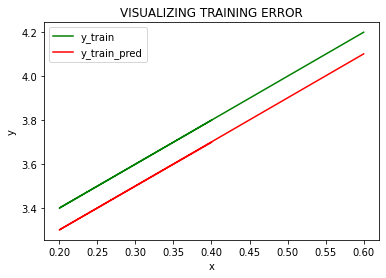

In [38]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [39]:
y_test_list = list(y_test)

In [40]:
y_test_pred = []
for i in x_test:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc.round(1))
y_test_pred

[4.5, 5.00000000000000]

In [41]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[0.0999999999999996, 0]
Mean Square Error:  0.0499999999999998


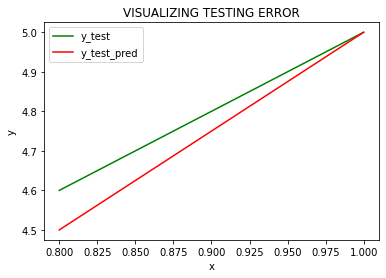

In [42]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(list(x_test),list(y_test),label='y_test',color='green')
plt.plot(list(x_test),y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Predict**

In [43]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.8
Predicted y value: 6.62
